In [100]:
import warnings
warnings.filterwarnings('ignore')

# Importowanie potrzebnych bibliotek

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Ładowanie danych

<hr>

australian.dat

In [102]:
df = pd.read_csv("australian.dat", delimiter= " ", header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


iris dataset

In [103]:
iris = load_iris()
df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df2['target'] = iris.target
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Zamiana nazw kolumn na dummy

In [104]:
df.columns = [f'column_{i}' for i in range(14)]+['class']
df.head()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Rozdzielenie na X i Y

In [105]:
X = df[[f'column_{i}' for i in range(14)]]
Y = df[['class']]
X2 = df2.drop('target', axis=1)
Y2 = df2['target'] 
X

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [106]:
Y

,class
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


In [107]:
X2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
Y2

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

# Tworzenie modeli i ocen

<hr>

## 1. Modele sprawdzianu krzyżowego (K-krotny sprawdzian krzyżowy)

In [109]:
def cross_validation(model, X, y, cv=10):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-Validation Mean Score: {np.mean(scores)}")

In [110]:
cross_validation(RandomForestClassifier(), X, Y)

Cross-Validation Mean Score: 0.8623188405797102


Wyższe wartości oznaczają lepszą generalizację modelu. Najczęściej wyniki kształtują się między 0 a 1, gdzie 1 oznacza idealną generalizację. Aktualnie mamy wynik bliski jedynce więc mamy całkiem niezłą generalizację.

## 2. Tworzenie modelu regresji bazowej

In [111]:
def baseline_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DummyRegressor(strategy = "mean")
    model.fit(X_train, y_train)
    mse = model.score(X_test, y_test)
    print(f"Baseline Regression Error: {mse}")

In [112]:
baseline_regression(X,Y)

Baseline Regression Error: -0.03808879873788573


Niższe wartości błędu są lepsze. Wynik aktualny jest bliski 1, więc jest to dość mały błąd.

## 3. Tworzenie modelu klasyfikacji bazowej

In [113]:
def baseline_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DummyClassifier(strategy="uniform")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    print(f"Baseline Classification Accuracy: {accuracy}")

In [114]:
baseline_classification(X,Y)

Baseline Classification Accuracy: 0.47101449275362317


Wyższe wartości dokładności (accuracy) są lepsze. Accuracy to stosunek poprawnie sklasyfikowanych przypadków do ogólnej liczby przypadków. Dokładność w tym przypadku wyonsi ok. 0.5, a więc tak jak spodziewany lsoowy klasyfikator 0.5.

## 4. Ocena prognoz klasyfikatora binarnego

In [115]:
def evaluate_binary_classifier(X, y):
    # Przykładowy model klasyfikatora binarnego
    model = RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Binary Classifier Precision: {precision}")
    print(f"Binary Classifier Recall: {recall}")
    print(f"Binary Classifier F1 Score: {f1}")

In [116]:
evaluate_binary_classifier(X,Y)

Binary Classifier Precision: 0.8367346938775511
Binary Classifier Recall: 0.803921568627451
Binary Classifier F1 Score: 0.8200000000000001


Wyższe wartości precision, recall i F1 score są lepsze:
* Precision mierzy stosunek poprawnie sklasyfikowanych pozytywnych przypadków do wszystkich sklasyfikowanych pozytywnych przypadków.
* Recall mierzy stosunek poprawnie sklasyfikowanych pozytywnych przypadków do wszystkich prawdziwie pozytywnych przypadków.
* F1 score to średnia harmoniczna precision i recall.

<hr>

W powyższym przykładzie mamy dość wysokie, zadowalające wyniki

## 5. Ocena progowania klasyfikatora binarnego

In [117]:
%matplotlib inline

In [118]:
def evaluate_binary_classifier_threshold(X, y, threshold=0.5):
    # Przykładowy model klasyfikatora binarnego
    model = RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    probabilities = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, probabilities)

    # Krzywa ROC
    fpr, tpr, _ = roc_curve(y_test, probabilities)

    print(f"Binary Classifier ROC AUC Score: {roc_auc}")

    # Rysowanie krzywej ROC
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Binary Classifier ROC AUC Score: 0.9248366013071896


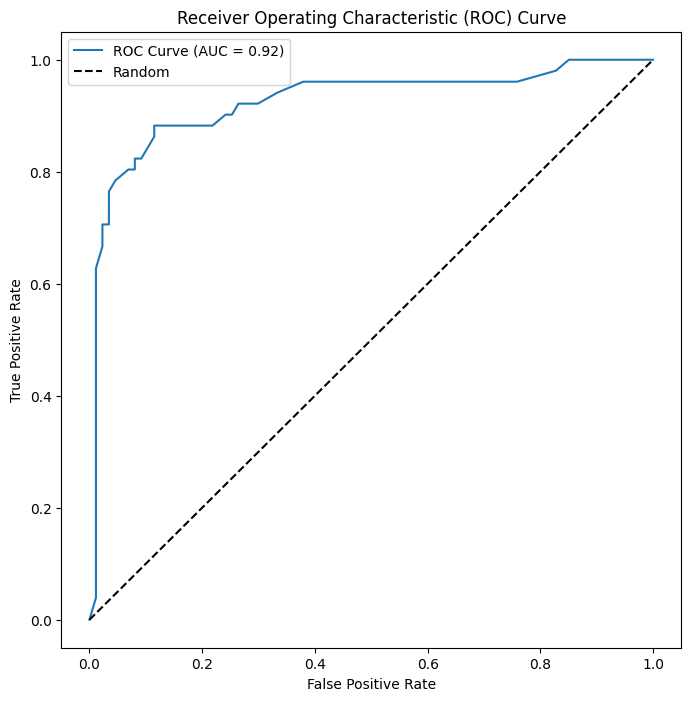

In [119]:
evaluate_binary_classifier_threshold(X,Y)

Wyższe wartości roc_auc_score oznaczają lepszą jakość klasyfikatora binarnego, zwłaszcza jeśli model operuje w różnych punktach odcięcia

<hr>

W powyższym przykładzie mamy dość wysokie, zadowalające wyniki

## 6. Ocena prognoz klasyfikatora wieloklasowego

In [120]:
def evaluate_multiclass_classifier(X, y):
    # Przykładowy model klasyfikatora wieloklasowego
    model = RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Multiclass Classifier Accuracy: {accuracy}")

In [121]:
evaluate_multiclass_classifier(X2,Y2)

Multiclass Classifier Accuracy: 1.0


Wyższe wartości dokładności (accuracy) są lepsze. Natomiast accuracy równe 1.0 może sugerować o dopasowaniu nadmiarowym, co może skutkować złą predykcją w przypadku danych spoza datasetu.

## 7. Ocena modelu regresji

In [122]:
def evaluate_regression(X, y):
    # Przykładowy model regresji
    model = RandomForestRegressor()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f"Regression Mean Squared Error: {mse}")

In [123]:
evaluate_regression(X2,Y2)

Regression Mean Squared Error: 0.0012666666666666664


Niższe wartości błędu średniokwadratowego (MSE) są lepsze. Wynik jest wręcz idealny, możliwe nadmierne dopasowanie.

## 8. Ocena modelu klasteryzacji

In [124]:
def evaluate_clustering(X, num_clusters=3):
    # Przykładowy model klasteryzacji
    model = KMeans(n_clusters=num_clusters)
    predictions = model.fit_predict(X)

    silhouette = silhouette_score(X, predictions)
    print(f"Clustering Silhouette Score: {silhouette}")

In [126]:
evaluate_clustering(X)

Clustering Silhouette Score: 0.9627110261396301


Wyższe wartości współczynnika silwetki (silhouette score) są lepsze. Silhouette score mierzy, jak dobrze oddzielone są klastry.
Aktualny wynik jest nzadowalający ponieważ ma wyniknbliski 1, czyli klastry są dobrze oddzielone.